# **Identifying differentially expressed genes involved in Tetralogy of Fallot**

Tetralogy of Fallot (TOF) is a congenital heart defect that affects the structure of the heart and its ability to pump blood to the body (1). TOF is one of the most common forms of congenital heart disease, accounting for around 10% of all cases (2). The condition is characterized by a combination of four abnormalities in the heart: a ventricular septal defect (VSD), narrowing of the pulmonary artery (pulmonary stenosis), an enlarged aorta that overrides the VSD, and right ventricular hypertrophy (thickening of the muscle in the right ventricle) (3). These abnormalities can cause oxygen-poor blood to be pumped to the body, resulting in symptoms such as cyanosis (bluish discoloration of the skin), shortness of breath, and fatigue. While TOF is a serious condition, advances in medical treatment have greatly improved the long-term outlook for those born with the defect (4).

Locating differentially expressed genes can provide valuable insights into the underlying biological mechanisms of Tetralogy of Fallot (TOF) and help identify potential therapeutic targets. Differentially expressed genes are genes that are expressed at different levels between affected individuals and healthy controls. These genes can be identified using techniques such as microarray analysis or RNA sequencing. 

In today's assignment we will use a dataset from the EMBL-EBI's Expression Atlas to locate differentially expressed genes for TOF (5, 6). You will visualize your results with a volcano plot. Let's get started!

**First run the following code to import some libraries that we will need.**

In [2]:
# importing libraries
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from scipy.stats import ttest_ind
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler


#### **Exercise 3.1**

First, we have to load two data files. One file depicts the normalize gene counts (`normalized_counts.csv`) and the other file the so-called experimental design (`experiment_design.txt`). 
The two files contain the following information:
- Experimental design
  - `Run`: ID for every separate patient.
  - `disease`: gives information if the patient was healthy (`normal`) or affected (`Tetralogy of Fallot`).
  - `Gene ID`: Separate identifier for every separate gene.
  - `Gene Name`
  - `Gene ID`
  - `Gene Name`: depicting all measured genes
  - Multiple columns starting with `SR...`: ID for every separate patient with ofcourse the corresponding gene count.

Both files contain more information that we will not use for this assignment, but you can have a look if you are interested :)

In order to work with the data we have to combine the two files:

1. Read both files by using `pd.read_csv()`, you might have to think about what argument you pass to `sep` for both files.
2. Transform the patient ID into "long" format. This means that instead of having a column for every patient you have one column with the different patient id's. You can do this with the function `pd.melt()`
3. Merge both dataframes on the column `Run` (Which is the patient ID). 
4. Look at your merged dataframe and decide which information (or columns) you want to keep and select those for a new dataframe.

*hint: Look at the documentation for the suggested functions to know how to use them.*

In [ ]:
# 1. Reading files
df_ = pd.read_csv('normalized_counts.csv')
design = pd.read_csv('experiment_design.txt', sep='\t')[['Run', 'disease']]

# 2. Transforming file into long format
df_ = df_.melt(id_vars=['Gene ID', 'Gene Name'], var_name='Run', value_name='geneCount')

# 3. and 4. Merging and selection of columns
df = df_.merge(design, on='Run')[['Gene ID', 'Gene Name', 'Run', 'geneCount', 'disease']]

df

#### **Exercise 3.2**

Principal component Analysis.

Now that we loaded the data we can perform a PCA on the samples and then visualize the data, this will help us to understand if there is a difference in the 2 conditions based on RNA expression. In fact we expect that, based on expression profiling, the 2 samples will clusterize together, in this way we will know that the 2 groups (disease and non-disease) differs.

In order to do this we will need to:
- Groupby for Sample
- Run PCA 
- Plot the results 

In [ ]:
# Groupby for patient "Run" keeping all the genes and the disease status



In [ ]:
# With this feature we will extract the numbers that reflects the expression of each gene (features) related to every sample, we will end up with a matrix (table) of 
# $n_samples x n_features$


# Fill missing values of our features with 0


array([[ 36.70015807,   0.        , 160.68717859, ...,   0.        ,
          0.        ,   0.        ],
       [ 42.65153506,   0.        ,  97.20582408, ...,   0.        ,
          0.        ,   0.        ],
       [ 31.74067725,   0.        ,  80.34358929, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [130.47010481,   2.12146512, 240.78629099, ...,   0.        ,
          0.        ,   0.        ],
       [ 66.82615124,   0.        , 107.1339885 , ...,   0.        ,
          0.        ,   0.        ],
       [106.07325594,   0.        , 191.99259326, ...,   0.        ,
          0.        ,   0.        ]])

In [ ]:
# Normalize and Standardize the samples (by row)


In [ ]:
# Run the PCA
pca = PCA(n_components=2)


rna_expression_reduced = 


array([[ 9.96919528e+00,  3.60694293e+01],
       [-5.92670884e+00,  8.18183989e+01],
       [ 1.15056654e+01,  8.65698420e+01],
       [ 3.96074392e+01,  1.13665291e+02],
       [ 5.14264793e+01,  1.06533381e+02],
       [ 5.67604678e+01,  5.79096610e+01],
       [-6.87948493e-01,  3.23374738e+01],
       [ 6.29766113e-03, -5.58118919e+01],
       [-3.25016511e+01,  2.70415129e+01],
       [-5.22695984e+01, -1.24532536e+01],
       [-4.56524591e+01, -2.78997502e+01],
       [-8.98034251e+00,  1.91928399e+01],
       [ 5.99357248e+00, -3.57800087e+01],
       [-4.12860180e+01,  2.81695800e+01],
       [-2.75563697e+01, -4.24939587e+01],
       [-8.63949151e+00,  2.65209618e+00],
       [-2.54462455e+01, -3.75119773e+01],
       [ 6.71047625e+01, -9.18570414e+01],
       [-5.09577434e+01, -9.07859449e+00],
       [-3.29232678e+01, -1.20182133e+00],
       [ 4.39938979e+01, -1.33733746e+01],
       [-1.44147810e+01, -5.72639353e+01],
       [-5.32137565e+01,  3.69968509e+01],
       [-5.

In [ ]:
# Add the new features to new dataframe columns [pc1,pc2]

df_samples['pc1'] = 
df_samples['pc2'] = 


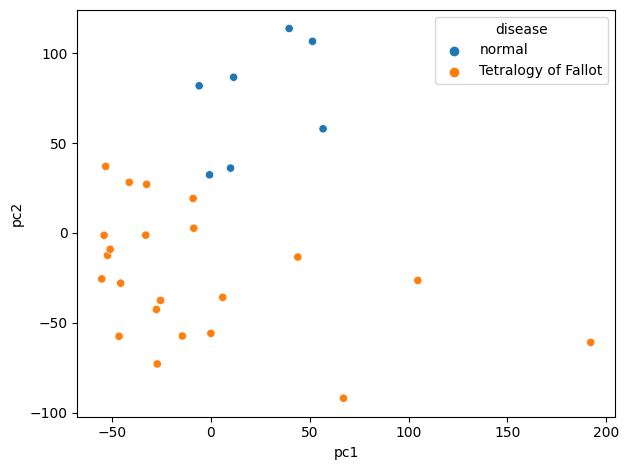

In [ ]:
# Plot the results
sns.scatterplot(, x=,y=, hue=)
plt.show()


#### **Exercise 3.2**

Now we have to clean up the data a bit and filter out low gene counts. 

1. Remove the rows in the dataframe that contain "NaN" values for the column `geneCount`.
2. Remove the genes that have a **total sum** gene count under 100.000

In [ ]:
# 1. Removing NaN values


# 2. Remove genes with low gene count


8033

#### **Exercise 3.3**

Complete the missing parts in the following code block. The function is supposed to return the following two measures:

Complete the code after the comment blocks for:

1. Calculate the foldchange using the predefined variables and store in a new variable
2. Use the Function `ttest_ind()` correctly and store the p-value in a new variable. (Read the documentation how to use the function `ttest_ind()`.
3. Before you can store your foldchange and p-value into a new column, you need to transform both as follows:
  - $log_{2} (FoldChange)$
  - $-log_{10} (P value)$

In [ ]:
def p_val(x):

    # Selecting the both disease conditions
    tof = x[x.disease == 'Tetralogy of Fallot']['geneCount']
    norm = x[x.disease == 'normal']['geneCount']

    ## INSERT CODE HERE (1):
    
    
    ## INSERT CODE HERE (2):
    

    ## INSERT CODE HERE (3):
    x['foldChange'] =
    x['pValue'] =

    # Return your new results
    return x

#### **Exercise 3.4**

Next step is to apply the function to the dataframe, but we wil need to do this per `Gene Name`. There is a convenient function for this in pandas `groupby()`. Next we can apply the function to the dataframe by using the function `apply()`. These functions have to apply consequently though.

Fill in the missing arguments to the next line
1. Correct column name that we want to apply the grouping to.
2. Fill in the function name to the `apply()` function.


In [ ]:
df = df.groupby().apply(lambda x: )

#### **Exercise 3.5**

Now we come to the most fun part, plotting our results! In the following line you can see two parameters:

- `fc_b`: this depicts the cut-off value for the $log_{2}(foldchange)$. This means that you will only see the Gene names appear that are either smaller than `-fc_b` or larger than `fc_b`.
- `alpha`: The probability of incorrectly rejecting a true null hypothesis. We want our p-value to be smaller to be able to say that our two conditions are significantly different. By convention the value of 0.05 is most used for the alpha.

Play around with both parameters and run both blocks of code to see what happens.

When you have a nice collection of genes try to write a small report if the found genes make sense regarding the disease.

In [ ]:
fc_b =
alpha =

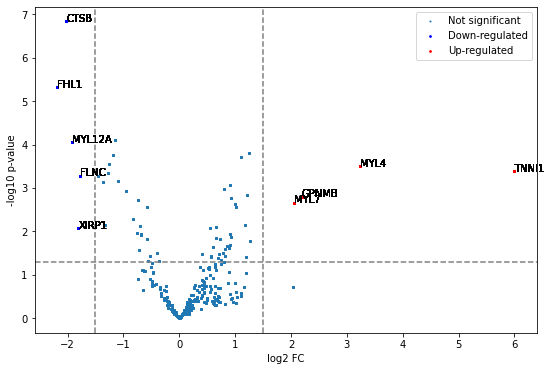

In [ ]:
# Initialize figure
plt.figure(figsize=(9,6))

# log transform the alpha value
p_b = -np.log10(alpha)

# Start with plotting all points
plt.scatter(x=df['foldChange'], y=df['pValue'], s=1, label="Not significant")

# highlight down- or up- regulated genes
down = df[(df['foldChange'] <= -fc_b) & (df['pValue'] >= p_b)]
up = df[(df['foldChange'] >= fc_b) & (df['pValue'] >= p_b)]
plt.scatter(x=down['foldChange'], y=down['pValue'],s=3, label="Down-regulated",color="blue")
plt.scatter(x=up['foldChange'], y=up['pValue'], s=3, label="Up-regulated",color="red")

# Add text to highlighted genes
for i, r in up.iterrows():
    plt.text(x=r['foldChange'], y=r['pValue'], s=r['Gene Name'])
    
for i, r in down.iterrows():
    plt.text(x=r['foldChange'], y=r['pValue'], s=r['Gene Name'])

# Plot layout
plt.xlabel("log2 FC")
plt.ylabel("-log10 p-value")
plt.axvline(-fc_b, color="grey",linestyle="--")
plt.axvline(fc_b, color="grey",linestyle="--")
plt.axhline(p_b, color="grey",linestyle="--")
plt.legend()

References:

1. American Heart Association. (2022). Tetralogy of Fallot. Retrieved from https://www.heart.org/en/health-topics/congenital-heart-defects/about-congenital-heart-defects/tetralogy-of-fallot
2. Centers for Disease Control and Prevention. (2022). Facts about Tetralogy of Fallot. Retrieved from https://www.cdc.gov/ncbddd/heartdefects/tetralogyoffallot.html
4. Mayo Clinic. (2022). Tetralogy of Fallot. Retrieved from https://www.mayoclinic.org/diseases-conditions/tetralogy-of-fallot/symptoms-causes/syc-20353477
4. Mocarski, M., & Bilek, L. (2021). Tetralogy of Fallot. StatPearls [Internet]. Retrieved from https://www.ncbi.nlm.nih.gov/books/NBK513263/
5. Expression Atlas (EMBI-EBI). Retrieved from https://www.ebi.ac.uk/gxa/home
6. Grunert M, Dorn C, Schueler M, Dunkel I, Schlesinger J et al. (2014) Rare and private variations in neural crest, apoptosis and sarcomere genes define the polygenic background of isolated Tetralogy of Fallot.
